# Content
1. Load data and packages

In [230]:
import numpy as np
import pandas as pd
import sklearn
import os
import glob
import plotly.express as px
import matplotlib.pyplot as plt

## Data load

In [8]:
path = os.getcwd()
csv_files = glob.glob(os.path.join(path, "*.csv"))
# loop over the list of csv files
for f in csv_files:

    # read the csv file
    df = pd.read_csv(f)

    # print the location and filename
    print('Location:', f)
    print('File Name:', f.split("\\")[-1])

    print(df.columns)
    # print the content
    print('Content:')
    print(df.head())

    print('-' * 80)


Location: /Users/tangsw/Library/CloudStorage/GoogleDrive-tangsw@umich.edu/My Drive/mac/2023 Ross Datathon/7. Flight_Traffic_2017.csv
File Name: /Users/tangsw/Library/CloudStorage/GoogleDrive-tangsw@umich.edu/My Drive/mac/2023 Ross Datathon/7. Flight_Traffic_2017.csv
Index(['year', 'month', 'day', 'airline_id', 'origin_airport',
       'destination_airport', 'scheduled_departure', 'actual_departure',
       'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in', 'scheduled_arrival',
       'actual_arrival', 'cancelled', 'diverted', 'scheduled_elapsed',
       'actual_elapsed', 'distance', 'airline_delay', 'weather_delay',
       'air_system_delay', 'security_delay', 'aircraft_delay'],
      dtype='object')
Content:
   year  month  day airline_id origin_airport destination_airport  \
0  2017      1   31         AA            CLT                 PHX   
1  2017      1   12         AA            FLL                 CLT   
2  2017      1   14         AA            FLL                 CLT   
3  201

In [12]:
df_flight_traffic = pd.read_csv('7. Flight_Traffic_2017.csv')
df_flight_traffic.head()

,year,month,day,airline_id,origin_airport,destination_airport,scheduled_departure,actual_departure,taxi_out,wheels_off,...,cancelled,diverted,scheduled_elapsed,actual_elapsed,distance,airline_delay,weather_delay,air_system_delay,security_delay,aircraft_delay
0,2017,1,31,AA,CLT,PHX,1619,1615.0,18.0,1633.0,...,0,0,277.0,261.0,1773,NaN,NaN,NaN,NaN,NaN
1,2017,1,12,AA,FLL,CLT,1305,1256.0,24.0,1320.0,...,0,0,123.0,129.0,632,NaN,NaN,NaN,NaN,NaN
2,2017,1,14,AA,FLL,CLT,1305,1314.0,11.0,1325.0,...,0,0,123.0,108.0,632,NaN,NaN,NaN,NaN,NaN
3,2017,1,18,AA,FLL,CLT,1305,1304.0,19.0,1323.0,...,0,0,123.0,129.0,632,NaN,NaN,NaN,NaN,NaN
4,2017,1,25,AA,FLL,CLT,1305,1301.0,11.0,1312.0,...,0,0,123.0,116.0,632,NaN,NaN,NaN,NaN,NaN


In [16]:
pd.unique(df_flight_traffic['airline_id'])

array(['AA', 'B6', 'DL', 'EV', 'F9', 'HA', 'NK', 'OO', 'UA', 'WN', 'AS',
       'VX'], dtype=object)

In [167]:
jet_blue_2017 = df_flight_traffic[df_flight_traffic['airline_id'] == 'B6']
print(jet_blue_2017.head())
# finding na
print('Printing null counts in every column', '\n', jet_blue_2017.isnull().sum())
# drop ones with actual_arrival/actual_elapsed == null
jet_blue_2017 = jet_blue_2017[(jet_blue_2017.actual_arrival.isnull() == False) & (jet_blue_2017.actual_elapsed.isnull() == False)]
# replace zero
jet_blue_2017 = jet_blue_2017.fillna(0)
# calculate total delay min
jet_blue_2017['Total_delay(min)'] = jet_blue_2017.iloc[:, -5:].sum(axis=1)

      year  month  day airline_id origin_airport destination_airport  \
1799  2017      1   18         B6            HPN                 PBI   
1800  2017      1   23         B6            HPN                 PBI   
1801  2017      1   26         B6            HPN                 PBI   
1802  2017      1   29         B6            HPN                 PBI   
1803  2017      1    5         B6            PBI                 HPN   

      scheduled_departure  actual_departure  taxi_out  wheels_off  ...  \
1799                 1131            1150.0      20.0      1210.0  ...   
1800                 1131            1119.0      10.0      1129.0  ...   
1801                 1131            1119.0      15.0      1134.0  ...   
1802                 1131            1131.0      15.0      1146.0  ...   
1803                 1948            2029.0       9.0      2038.0  ...   

      cancelled  diverted  scheduled_elapsed  actual_elapsed  distance  \
1799          0         0              182.0    

In [168]:
jet_blue_2017.head()

,year,month,day,airline_id,origin_airport,destination_airport,scheduled_departure,actual_departure,taxi_out,wheels_off,...,diverted,scheduled_elapsed,actual_elapsed,distance,airline_delay,weather_delay,air_system_delay,security_delay,aircraft_delay,Total_delay(min)
1799,2017,1,18,B6,HPN,PBI,1131,1150.0,20.0,1210.0,...,0,182.0,165.0,1056,0.0,0.0,0.0,0.0,0.0,0.0
1800,2017,1,23,B6,HPN,PBI,1131,1119.0,10.0,1129.0,...,0,182.0,171.0,1056,0.0,0.0,0.0,0.0,0.0,0.0
1801,2017,1,26,B6,HPN,PBI,1131,1119.0,15.0,1134.0,...,0,182.0,184.0,1056,0.0,0.0,0.0,0.0,0.0,0.0
1802,2017,1,29,B6,HPN,PBI,1131,1131.0,15.0,1146.0,...,0,182.0,213.0,1056,0.0,0.0,31.0,0.0,0.0,31.0
1803,2017,1,5,B6,PBI,HPN,1948,2029.0,9.0,2038.0,...,0,161.0,149.0,1056,8.0,0.0,0.0,0.0,21.0,29.0


# without month grouping

In [178]:
# without month grouping
(jet_blue_2017.groupby(['origin_airport','destination_airport','month'])
 .aggregate({'cancelled': 'count', 'diverted':'count', 'Total_delay(min)': 'sum', 'distance':'sum'})
)

cancelled  diverted  \
origin_airport destination_airport month                        
ABQ            JFK                 1              2         2   
                                   2              1         1   
                                   4              4         4   
                                   5              3         3   
                                   6              5         5   
...                                             ...       ...   
TPA            SJU                 6              4         4   
                                   7              4         4   
                                   8              5         5   
                                   9              2         2   
                                   12             7         7   

                                          Total_delay(min)  distance  
origin_airport destination_airport month                              
ABQ            JFK                 1                   0.0      3652  
                                   2                   0.0      1826  
                                   4                  33.0      7304  
                                   5                   0.0      5478  
                                   6                 149.0      9130  
...                                                    ...       ...  
TPA            SJU                 6                  52.0      4948  
                                   7                 411.0      4948  
                                   8                   0.0      6185  
                                   9                   0.0      2474  
                                   12                  0.0      8659  

[3980 rows x 4 columns]

# With month grouping

In [186]:
airport_distiance = (jet_blue_2017[['origin_airport','destination_airport','distance']]
                     .groupby(['origin_airport','destination_airport','distance'])
                     .size()
                     .reset_index()
                     .iloc[:,0:3])
airport_distiance

,origin_airport,destination_airport,distance
0,ABQ,JFK,1826
1,ACK,BOS,91
2,ACK,DCA,405
3,ACK,JFK,199
4,ALB,FLL,1204
...,...,...,...
362,TPA,DCA,814
363,TPA,EWR,997
364,TPA,HPN,1032
365,TPA,JFK,1005


In [189]:
jet_blue_2017_grp = (jet_blue_2017.groupby(['origin_airport','destination_airport'])
 .aggregate({'cancelled': 'count', 'Total_delay(min)': 'sum'})
 .sort_values(by=['Total_delay(min)','cancelled'], ascending=False)
)
jet_blue_2017_grp.rename(columns={"cancelled":"flight count"}, inplace=True)
jet_blue_2017_grp

,,flight count,Total_delay(min)
origin_airport,destination_airport,,
EWR,MCO,252,7712.0
LAX,JFK,364,7164.0
JFK,BOS,276,6929.0
MCO,JFK,265,6923.0
JFK,MCO,233,6543.0
...,...,...,...
SMF,BOS,3,47.0
SLC,FLL,4,41.0
DCA,ACK,6,0.0


In [190]:
# looking at ratio of total_delay per route
# because delay time can be large due to number of flights flying is large
jet_blue_2017_grp['Delay Ratio(min/flight)'] = jet_blue_2017_grp['Total_delay(min)'] / jet_blue_2017_grp['flight count']
jet_blue_2017_grp.sort_values(by='Delay Ratio(min/flight)', ascending=False)

,,flight count,Total_delay(min),Delay Ratio(min/flight)
origin_airport,destination_airport,,,
ACK,DCA,2,263.0,131.500000
BOS,OAK,10,692.0,69.200000
STT,BOS,4,236.0,59.000000
MVY,JFK,17,978.0,57.529412
SJU,ORD,1,51.0,51.000000
...,...,...,...,...
SAN,FLL,19,55.0,2.894737
DTW,FLL,36,69.0,1.916667
DCA,ACK,6,0.0,0.000000


In [194]:
total_delay_ratio = jet_blue_2017_grp['Total_delay(min)'].sum() / jet_blue_2017_grp['flight count'].sum()
jet_blue_2017_grp['Delay_Ratio_Relativity'] = jet_blue_2017_grp['Delay Ratio(min/flight)'] / total_delay_ratio
# jet_blue_2017_grp.sort_values(by='Delay_Ratio_Relativity', ascending=False)
jet_blue_2017_grp

,,flight count,Total_delay(min),Delay Ratio(min/flight),Delay_Ratio_Relativity
origin_airport,destination_airport,,,,
EWR,MCO,252,7712.0,30.603175,1.626283
LAX,JFK,364,7164.0,19.681319,1.045885
JFK,BOS,276,6929.0,25.105072,1.334108
MCO,JFK,265,6923.0,26.124528,1.388283
JFK,MCO,233,6543.0,28.081545,1.492281
...,...,...,...,...,...
SMF,BOS,3,47.0,15.666667,0.832542
SLC,FLL,4,41.0,10.250000,0.544695
DCA,ACK,6,0.0,0.000000,0.000000


In [195]:
total_delay_ratio

18.817866703274074

In [196]:
state_airport_df= pd.read_csv('5. Air_Traffic_2021.csv')
state_airport_df = state_airport_df.groupby(['ORIGIN','ORIGIN_STATE_ABR']).size().reset_index().iloc[:,:2]
jet_blue_2017_grp = jet_blue_2017_grp.reset_index()
state_airport_df

,ORIGIN,ORIGIN_STATE_ABR
0,01A,AK
1,05A,AK
2,06A,AK
3,09A,AK
4,1B1,NY
...,...,...
1356,ZXF,AK
1357,ZXH,AK
1358,ZXT,CA
1359,ZXU,RI


In [197]:
jet_blue_2017_grp.head()

,origin_airport,destination_airport,flight count,Total_delay(min),Delay Ratio(min/flight),Delay_Ratio_Relativity
0,EWR,MCO,252,7712.0,30.603175,1.626283
1,LAX,JFK,364,7164.0,19.681319,1.045885
2,JFK,BOS,276,6929.0,25.105072,1.334108
3,MCO,JFK,265,6923.0,26.124528,1.388283
4,JFK,MCO,233,6543.0,28.081545,1.492281


In [200]:
# merge it with groupby
plot_2017_df = jet_blue_2017_grp.merge(state_airport_df,
                                       left_on='origin_airport',
                                       right_on='ORIGIN')
# rename state name into origin_state
plot_2017_df = plot_2017_df.rename(columns={'ORIGIN_STATE_ABR': 'origin_state'})
plot_2017_df.drop(columns=['ORIGIN'], inplace=True)
plot_2017_df = plot_2017_df.merge(state_airport_df,
                                       left_on='destination_airport',
                                       right_on='ORIGIN')
plot_2017_df = plot_2017_df.rename(columns={'ORIGIN_STATE_ABR': 'destination_state'})
plot_2017_df.drop(columns=['ORIGIN'], inplace=True)
plot_2017_df['flights %'] = plot_2017_df['flight count'] / np.sum(plot_2017_df['flight count'])
plot_2017_df.head()

,origin_airport,destination_airport,flight count,Total_delay(min),Delay Ratio(min/flight),Delay_Ratio_Relativity,origin_state,destination_state,flights %
0,EWR,MCO,252,7712.0,30.603175,1.626283,NJ,FL,0.008649
1,LAX,MCO,50,1059.0,21.180000,1.125526,CA,FL,0.001716
2,JFK,MCO,233,6543.0,28.081545,1.492281,NY,FL,0.007996
3,LGA,MCO,135,2591.0,19.192593,1.019913,NY,FL,0.004633
4,DCA,MCO,167,3407.0,20.401198,1.084140,VA,FL,0.005731


# select three major states origin/ destination
---

In [201]:
plot_2017_df

,origin_airport,destination_airport,flight count,Total_delay(min),Delay Ratio(min/flight),Delay_Ratio_Relativity,origin_state,destination_state,flights %
0,EWR,MCO,252,7712.0,30.603175,1.626283,NJ,FL,0.008649
1,LAX,MCO,50,1059.0,21.180000,1.125526,CA,FL,0.001716
2,JFK,MCO,233,6543.0,28.081545,1.492281,NY,FL,0.007996
3,LGA,MCO,135,2591.0,19.192593,1.019913,NY,FL,0.004633
4,DCA,MCO,167,3407.0,20.401198,1.084140,VA,FL,0.005731
...,...,...,...,...,...,...,...,...,...
358,BOS,STT,10,111.0,11.100000,0.589865,MA,VI,0.000343
359,SJU,STT,73,420.0,5.753425,0.305743,PR,VI,0.002505
360,SJU,STX,46,203.0,4.413043,0.234513,PR,VI,0.001579
361,SEA,ANC,8,367.0,45.875000,2.437843,WA,AK,0.000275


In [203]:
# aggregate into state level
(plot_2017_df.loc[:,['Total_delay(min)','flight count', 'origin_state','destination_state']]
            .groupby(['origin_state','destination_state']).sum()
 )

Total_delay(min)  flight count
origin_state destination_state                                
AK           OR                            428.0            10
             WA                            105.0            11
AZ           MA                            171.0            33
             NY                            652.0            38
CA           CA                          13717.0          1099
...                                          ...           ...
VT           NY                           2627.0           115
WA           AK                            367.0             8
             CA                           1458.0            78
             MA                           1861.0            74
             NY                           1120.0            47

[154 rows x 2 columns]

In [241]:
# state in flow and outflow
inflow_df = (plot_2017_df.loc[:,['Total_delay(min)','flight count', 'origin_state']]
             .groupby(['origin_state'])
             .sum()
             .reset_index())
outflow_df = (plot_2017_df.loc[:,['Total_delay(min)','flight count','destination_state']]
             .groupby(['destination_state'])
             .sum()
             .reset_index())
inflow_df['flow'] = 'Origin'
outflow_df['flow'] = 'Destination'
state_innout_flow = pd.concat([inflow_df.rename(columns={'origin_state':'state'}),
                               outflow_df.rename(columns={'destination_state':'state'})])
state_innout_flow.sort_values('Total_delay(min)',ascending=False)

,state,Total_delay(min),flight count,flow
5,FL,145652.0,6495,Origin
17,NY,135828.0,6084,Destination
17,NY,117385.0,6017,Origin
5,FL,110691.0,6395,Destination
9,MA,96710.0,5011,Destination
...,...,...,...,...
15,NM,797.0,38,Destination
28,VI,734.0,129,Destination
0,AK,533.0,21,Origin
0,AK,470.0,15,Destination


In [269]:
state_innout_flow['Delay rate'] = state_innout_flow['Total_delay(min)'] / state_innout_flow['flight count']
fig5 = plot_state_level(state_innout_flow, y='Delay rate', origin=True)
fig5.update_layout(title='2017 JetBlue {0} Flight (min/ flight) {1} State Map'.format('Average Delay per ', 'Origin'))
fig5.show()

In [ ]:
fig = px.bar(state_innout_flow[state_innout_flow.state.isin(['NY','FL','MA','CA','NJ','VA','PR','NV'])],
             x="state",
             y="Delay rate",
             color="flow",
             title="JetBlue 2017 State-wide Delay Time (min)")
fig.show()

# state_innout_flow

In [206]:
# plot for stacked bar chart
fig = px.bar(state_innout_flow[state_innout_flow.state.isin(['NY','FL','MA','CA','NJ','VA','PR','NV'])],
             x="state",
             y="Total_delay(min)",
             color="flow",
             title="JetBlue 2017 State-wide Delay Time (min)")
fig.show()
fig.write_html("JetBlue 2017 State-wide Delay Time (min).html")

In [268]:
# origin state aggregation
def plot_state_level(df, y, origin=True):
    """

    :param df: df
    :param y: string, is the values you want to plot
    :param origin:  bool
    :return:
    """
    flow = 'Origin' if origin else 'Destination'
    fig = px.choropleth(data_frame=df.loc[df['flow']==flow, [y,'state']],
                        locations='state',
                        locationmode="USA-states",
                        color=y, scope="usa")
    return fig

fig1 = plot_state_level(state_innout_flow, y='Total_delay(min)', origin=True)
fig1.update_layout(title='2017 JetBlue {0} Flight {1} State Map'.format('Total Delay(min)', 'Origin'))
fig1.show()
fig2 = plot_state_level(state_innout_flow, y='Total_delay(min)', origin=False)
fig2.update_layout(title='2017 JetBlue {0} Flight {1} State Map'.format('Total Delay(min)', 'Destination'))
fig2.show()

In [208]:
plot_2017_df[plot_2017_df['origin_state'].isin(('NY', 'FL', 'CA'))]

,origin_airport,destination_airport,flight count,Total_delay(min),Delay Ratio(min/flight),Delay_Ratio_Relativity,origin_state,destination_state,flights %
1,LAX,MCO,50,1059.0,21.180000,1.125526,CA,FL,0.001716
2,JFK,MCO,233,6543.0,28.081545,1.492281,NY,FL,0.007996
3,LGA,MCO,135,2591.0,19.192593,1.019913,NY,FL,0.004633
6,BUF,MCO,34,667.0,19.617647,1.042501,NY,FL,0.001167
8,HPN,MCO,118,1858.0,15.745763,0.836745,NY,FL,0.004050
...,...,...,...,...,...,...,...,...,...
346,FLL,PHL,69,1682.0,24.376812,1.295408,FL,PA,0.002368
348,FLL,DTW,42,1259.0,29.976190,1.592964,FL,MI,0.001441
350,FLL,CLE,40,918.0,22.950000,1.219586,FL,OH,0.001373
352,FLL,PIT,31,798.0,25.741935,1.367952,FL,PA,0.001064


# Adding miles into the analysis (Kind of useless)
----

In [213]:
airport_distiance.head()
plot_2017_df = plot_2017_df.merge(airport_distiance,
                   on=['origin_airport','destination_airport'])

In [214]:
plot_2017_df['total_distance_flew'] = plot_2017_df['flight count'] * plot_2017_df['distance']
plot_2017_df.head()

,origin_airport,destination_airport,flight count,Total_delay(min),Delay Ratio(min/flight),Delay_Ratio_Relativity,origin_state,destination_state,flights %,total_distance_flew,distance
0,EWR,MCO,252,7712.0,30.603175,1.626283,NJ,FL,0.008649,236124,937
1,LAX,MCO,50,1059.0,21.180000,1.125526,CA,FL,0.001716,110900,2218
2,JFK,MCO,233,6543.0,28.081545,1.492281,NY,FL,0.007996,219952,944
3,LGA,MCO,135,2591.0,19.192593,1.019913,NY,FL,0.004633,128250,950
4,DCA,MCO,167,3407.0,20.401198,1.084140,VA,FL,0.005731,126753,759


In [223]:
# state in flow and outflow
inflow_df = (plot_2017_df.loc[:,['total_distance_flew', 'origin_state']]
             .groupby(['origin_state'])
             .sum()
             .reset_index())
outflow_df = (plot_2017_df.loc[:,['total_distance_flew','destination_state']]
             .groupby(['destination_state'])
             .sum()
             .reset_index())
inflow_df['flow'] = 'Origin'
outflow_df['flow'] = 'Destination'
state_innout_flow = pd.concat([inflow_df.rename(columns={'origin_state':'state'}),
                               outflow_df.rename(columns={'destination_state':'state'})])
state_innout_flow.sort_values('total_distance_flew',ascending=False)

,state,total_distance_flew,flow
5,FL,7029166,Origin
5,FL,6882683,Destination
17,NY,6657496,Destination
17,NY,6438031,Origin
9,MA,4899915,Destination
...,...,...,...
29,VT,30590,Origin
11,ME,28119,Origin
28,VI,26218,Destination
0,AK,22378,Destination


In [218]:
# plot for stacked bar chart
fig = px.bar(state_innout_flow[state_innout_flow.state.isin(['NY','FL','MA','CA','NJ','VA','PR','NV'])],
             x="state",
             y="total_distance_flew",
             color="flow",
             title="JetBlue 2017 State-wide Total Distance Flew (Miles)")
fig.show()
fig.write_html("JetBlue 2017 State-wide Total Distance Flew.html")

In [224]:
fig3 = plot_state_level(state_innout_flow, y='total_distance_flew', origin=True)
fig3.update_layout(title='2017 JetBlue {0} Flight {1} State Map'.format('Total Distance Flew(miles)', 'Origin'))
fig3.show()
fig4 = plot_state_level(state_innout_flow, y='total_distance_flew', origin=True)
fig4.update_layout(title='2017 JetBlue {0} Flight {1} State Map'.format('Total Distance Flew(miles)', 'Destination'))
fig4.show()

Examine 3 major states, NY, FL, MA becuase they have the largest volumnes in delay count

In [233]:
state_airport_df

,ORIGIN,ORIGIN_STATE_ABR
0,01A,AK
1,05A,AK
2,06A,AK
3,09A,AK
4,1B1,NY
...,...,...
1356,ZXF,AK
1357,ZXH,AK
1358,ZXT,CA
1359,ZXU,RI


In [234]:
plot_2017_df.columns

Index(['origin_airport', 'destination_airport', 'flight count',
       'Total_delay(min)', 'Delay Ratio(min/flight)', 'Delay_Ratio_Relativity',
       'origin_state', 'destination_state', 'flights %', 'total_distance_flew',
       'distance'],
      dtype='object')

In [239]:
temp = (jet_blue_2017.groupby(['origin_airport','destination_airport','month'])
 .aggregate({'cancelled': 'count', 'diverted':'sum', 'Total_delay(min)': 'sum', 'distance':'sum'})
        .reset_index()
        .rename(columns={'cancelled':'flight count'})
        .merge(plot_2017_df[['origin_airport','destination_airport','origin_state','destination_state']], on=['origin_airport','destination_airport'])
)
temp[temp['origin_state']=='NY'].groupby('month').sum()

/var/folders/_7/mgbsp3412bb9ww14pbjh1x340000gn/T/ipykernel_21742/3153217667.py:7: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,flight count,diverted,Total_delay(min),distance
month,,,,
1,505,0,7980.0,511272
2,449,0,6308.0,481202
3,512,0,10444.0,546228
4,520,0,13533.0,598233
5,472,0,12430.0,517277
6,537,0,13968.0,562630
7,509,0,16252.0,513642
8,526,0,12060.0,595344
9,478,0,6368.0,469801


In [ ]:
pd.melt(temp[temp['origin_state']=='NY'].groupby('month').sum(),
        )

In [ ]:
plt.plot(x=np.arange(1,13),
        y=temp[temp['origin_state']=='NY'].groupby('month').sum().)

# Extrapolate result to 2018, 2019

In [240]:
np.arange(1,13)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

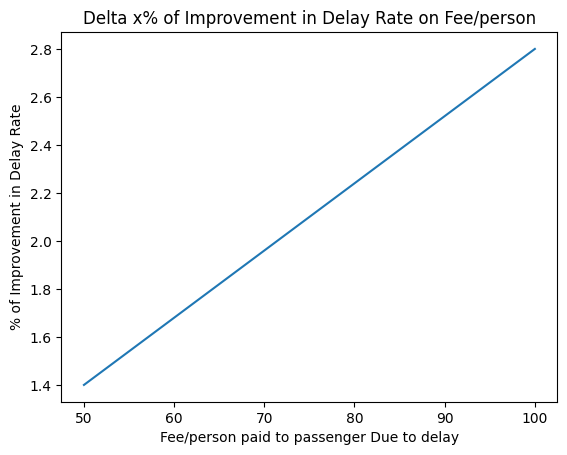

In [271]:
x = [50, 100]
y = [1.4, 2.8]
plt.plot(x,y)
plt.xlabel("Fee/person paid to passenger Due to delay")
plt.ylabel("% of Improvement in Delay Rate")
plt.title('Delta x% of Improvement in Delay Rate on Fee/person')
plt.savefig("delta.png")